# Importing Libraries.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(style='darkgrid',font_scale=1.5)

In [2]:
from scipy import stats
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

# Loading Dataset.

In [4]:
df = pd.read_csv('kidney-stone-dataset.csv',index_col=[0])
df

,gravity,ph,osmo,cond,urea,calc,target
0,1.021000,4.910000,725,14.000000,443,2.450000,0
1,1.017000,5.740000,577,20.000000,296,4.490000,0
2,1.008000,7.200000,321,14.900000,101,2.360000,0
3,1.011000,5.510000,408,12.600000,224,2.150000,0
4,1.005000,6.520000,187,7.500000,91,1.160000,0
...,...,...,...,...,...,...,...
85,1.021452,5.556081,756,24.241481,367,7.669120,1
86,1.016501,6.900257,549,20.549790,204,5.775256,1
87,1.032754,5.443491,1085,23.188653,576,8.664169,1
88,1.023870,5.106433,325,12.124689,50,0.781620,1


# Basic Understanding of Data.

### 1. Checking the Dimensions of Dataset.

In [5]:
print('Total number of record/rows present in the datset is:',df.shape[0])
print('Total number of attributess/columns in the dataset is:',df.shape[1])

Total number of record/rows present in the datset is: 90
Total number of attributess/columns in the dataset is: 7


### 2. Fetching the Attribute Names.

In [6]:
df.columns

Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

### 3. Assigning More Suitable Column Names for better Analysis.

In [7]:
df.rename(columns={'gravity':'Urine_Gravity','ph':'Urine_PH','osmo':'Osamolality','cond':'Conductivity','urea':'Urea','calc':'Calcium','target':'Target'},inplace=True)

### 4. Generating Basic Information of the Data.

In [8]:
df.info

<bound method DataFrame.info of     Urine_Gravity  Urine_PH  Osamolality  Conductivity  Urea   Calcium  Target
0        1.021000  4.910000          725     14.000000   443  2.450000       0
1        1.017000  5.740000          577     20.000000   296  4.490000       0
2        1.008000  7.200000          321     14.900000   101  2.360000       0
3        1.011000  5.510000          408     12.600000   224  2.150000       0
4        1.005000  6.520000          187      7.500000    91  1.160000       0
..            ...       ...          ...           ...   ...       ...     ...
85       1.021452  5.556081          756     24.241481   367  7.669120       1
86       1.016501  6.900257          549     20.549790   204  5.775256       1
87       1.032754  5.443491         1085     23.188653   576  8.664169       1
88       1.023870  5.106433          325     12.124689    50  0.781620       1
89       1.013723  6.308943          472     16.907792   174  2.556405       1

[90 rows x 7 column

### 5. Computing Total No. of Missing Values.

In [9]:
df.isnull().sum().to_frame().rename(columns={0:'Total No. of Missing Values'})

,Total No. of Missing Values
Urine_Gravity,0
Urine_PH,0
Osamolality,0
Conductivity,0
Urea,0
Calcium,0
Target,0


### 6. Checking Duplicate Records.

In [10]:
df.duplicated().any()

False

### 7. Performing Descriptive Statistical Analysis.

In [11]:
df.describe()

,Urine_Gravity,Urine_PH,Osamolality,Conductivity,Urea,Calcium,Target
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.017952,6.036651,602.333333,20.621687,258.200000,4.017788,0.500000
std,0.006780,0.711801,238.459805,7.654448,135.381127,3.016273,0.502801
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012258,5.536520,411.500000,14.150000,148.250000,1.412500,0.000000
50%,1.018000,5.936247,572.000000,21.177172,231.500000,3.230000,0.500000
75%,1.023000,6.490000,778.000000,26.075000,366.250000,5.965127,1.000000
max,1.034000,7.940000,1236.000000,38.000000,620.000000,13.000000,1.000000


# Data Preprocessing.

### 1. Segregating Feature & Labels for Model Training.

In [12]:
X = df.drop(columns=['Target'])
y = df['Target']

In [13]:
X.shape

(90, 6)

### 2. Splitting Data For Model Training & Testing.

In [14]:
x_train,x_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
print('Shape of x_train is:',x_train.shape)
print('Shape of x_test is:',x_test.shape)
print('Shape of y_train is:',y_train.shape)
print('Shape of y_test is:',y_test.shape)

Shape of x_train is: (72, 6)
Shape of x_test is: (18, 6)
Shape of y_train is: (72,)
Shape of y_test is: (18,)


# Model Creation Using Decision Tree.

In [16]:
clf = DecisionTreeClassifier() 

In [17]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
y_pred_test = clf.predict(x_test)
y_pred_train = clf.predict(x_train)

In [19]:
accuracy_score(y_test,y_pred_test)

0.6111111111111112

In [20]:
accuracy_score(y_train,y_pred_train)

1.0

In [21]:
from sklearn import tree

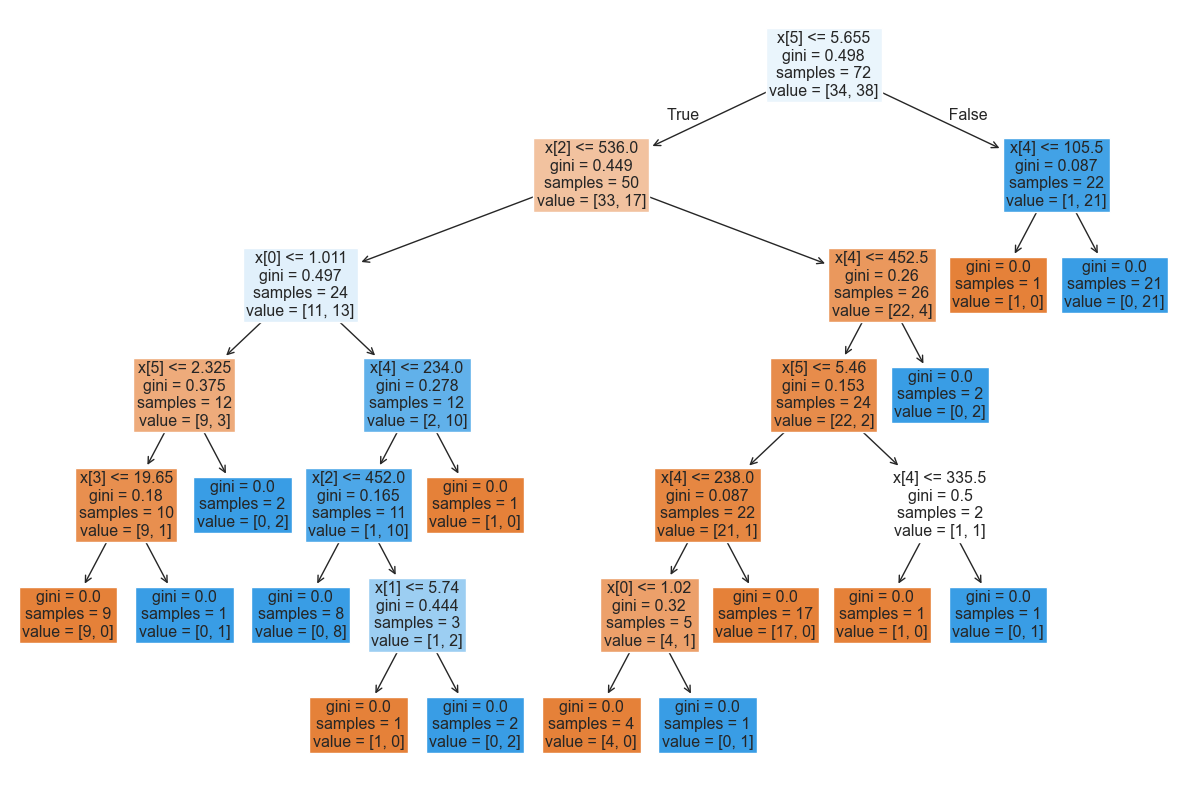

In [22]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

In [23]:
8*7*8*2*2*2*5

17920

### 1. Performing Grid-Search with cross-validation to find the best Parameter for thr Model.

In [24]:
param_grid = {
            'max_depth':[3,4,5,6,7,8,9,10],
            'min_samples_split':[2,3,4,5,6,7,8],
            'max_leaf_nodes':[1,2,3,4,5,6,7,8],
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'random_state':[0,42]
    
}

In [25]:
grid_search = GridSearchCV(clf,param_grid, cv=5, n_jobs=-1,verbose=1)

In [26]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 3584 candidates, totalling 17920 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']},
             verbose=1)

In [27]:
b = grid_search.best_params_
b

{'criterion': 'entropy',
 'max_depth': 4,
 'max_leaf_nodes': 7,
 'min_samples_split': 2,
 'random_state': 0,
 'splitter': 'best'}

In [28]:
dtree2 = DecisionTreeClassifier(**b)

dtree2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=7,
                       random_state=0)

### 2. Fetching the Best Parameters for DecisionTree Model.

In [29]:
best_parameters = grid_search.best_params_

print('Best Parameters for the DecisionTree Model is:\n\n')
best_parameters

Best Parameters for the DecisionTree Model is:




{'criterion': 'entropy',
 'max_depth': 4,
 'max_leaf_nodes': 7,
 'min_samples_split': 2,
 'random_state': 0,
 'splitter': 'best'}

In [30]:
# grid_search.cv_results_

In [31]:
y_pred_test = dtree2.predict(x_test)
y_pred_train = dtree2.predict(x_train)

In [32]:
print('Accuracy Score of Model on Testing Data is =>',round(accuracy_score(y_test,y_pred_test)))
print('Accuracy Score of Model on Training Data is =>',round(accuracy_score(y_train,y_pred_train)))

Accuracy Score of Model on Testing Data is => 1
Accuracy Score of Model on Training Data is => 1


# Random Forest Classifier.

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf = RandomForestClassifier()

In [35]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
y_pred_test = rf.predict(x_test)
y_pred_train = rf.predict(x_train)

In [37]:
accuracy_score(y_train,y_pred_train)

1.0

In [38]:
accuracy_score(y_test,y_pred_test)


0.8888888888888888

# Hyper Parameter Tuning.

In [39]:
param_grid = {
            'n_estimators': [50,100,200],   #NUmber of trees
            'max_depth':[3,4,5,6,7,8,9,10],
            'min_samples_split':[2,3,4,5,6,7,8],
            'min_samples_leaf':[1,2,3,4,5,6,7,8],
            'bootstrap':[True,False]   # bags take or not randomly
    
}

In [40]:
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid, cv=5, n_jobs=-1,verbose=1)
grid_search

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
bets_parameters = grid_search.best_params_

In [ ]:
print('Best Parameters:',best_parameters)

In [ ]:
best_rf_clf = grid_search.best_estimator_


In [ ]:
y_pred = best_rf_clf.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)

In [ ]:
y_pred_train = best_rf_clf.predict(x_train)

In [ ]:
accuracy = accuracy_score(y_test,y_pred_train)

In [ ]:
rf2 = RandomForestClassifier(**best_parameters)
rf2.fit(x_train,y_train)

In [ ]:
y_pred1 = rf2.predict(x_test)
y_pred_train1 = rf2.predict(x_train)

In [ ]:
accuracy = accuracy_score(y_train,y_pred1)

In [ ]:
accuracy = accuracy_score(y_train,y_pred_train1)